# Libraries

In [1]:
# Data Manipulation
import pandas as pd

# Data Filtering
import re

# Visualization
import matplotlib.pyplot as plt
import seaborn as sns
import plotly.express as px

# Fetching Dataset

In [2]:
with open('YouTubeTrailerComments.txt', 'r') as yttc:
    # Reads everything in the txt file.
    content = yttc.read()

content

'MovieID::::1\nI was looking for halloween themed movies and stumbled over this... is there anything halloween related in this film?\n\n\nSeen it years ago but can\'t remember squat\nwelp, been 3 years since anybody have commented\nWell, there was supposed to be another sequel. From what I heard, the two guys go to Italy (to meet their new relatives, I suppose) & wind up meeting Italian versions of themselves.\ni loved the first one is it like the first one or not??\n128238 170 7 0 7\nThe more things change, the more they stay the same in Wabasha, Minnesota. The uncatchable fish named Catfish Hunter grows fatter. The wisecracks, zingers and put downs pile up like freshly raked leaves. And GRUMPY OLD MEN become grumpier in the sequel that\'s "pure delight, a wonderfully warmhearted comedy" (David Sheehan, CBS-TV). Grabbing fishing rods and picking up where they left off, JACK LEMMON and WALTER MATTHAU reel in another comedy winner as GRUMPIER OLD MEN. ANN-MARGRET, DARYL HANNAH, KEVIN PO

## Convert to DataFrame

In [3]:
# Defining Columns.
columns = [
    'MovieID',
    'Views',
    'Likes',
    'Dislikes',
    'Share',
    'Comments'
]

# Filtering Data using Regular Expression.
df = pd.DataFrame(re.findall(r'MovieID::::(\d+)[\s\S]*?(?:\n(\d+)\s+(\d+)\s+(\d+)\s+(\d+)\s+(\d+)|(?=\sMovieID::::)|$)', content),
                  columns = columns)

# Converting the data in numeric format.
df[columns] = df[columns].apply(pd.to_numeric)
df

,MovieID,Views,Likes,Dislikes,Share,Comments
0,1,128238.0,170.0,7.0,0.0,7.0
1,2,155561.0,135.0,14.0,0.0,74.0
2,3,2532.0,7.0,2.0,0.0,1.0
3,4,6827.0,9.0,1.0,0.0,0.0
4,5,330807.0,374.0,16.0,0.0,121.0
...,...,...,...,...,...,...
995,996,252661.0,1080.0,32.0,0.0,111.0
996,997,5887.0,19.0,2.0,0.0,0.0
997,998,5755.0,10.0,1.0,0.0,0.0
998,999,6635.0,19.0,1.0,0.0,0.0


# Visualizations

In [4]:
def set_figure(width = 12.8, height = 7.2):
    # Default Chart Resolution: 1280x720p.
    plt.figure(figsize = (width, height))

def chart_decoration(title = str(), xlabel = str(), ylabel = str()):
    # Chart Decoration.
    plt.title(label = title)
    plt.xlabel(xlabel = xlabel)
    plt.ylabel(ylabel = ylabel)

    # Displaying Chart.
    plt.show()

## 1. Distribution of Viewer Count

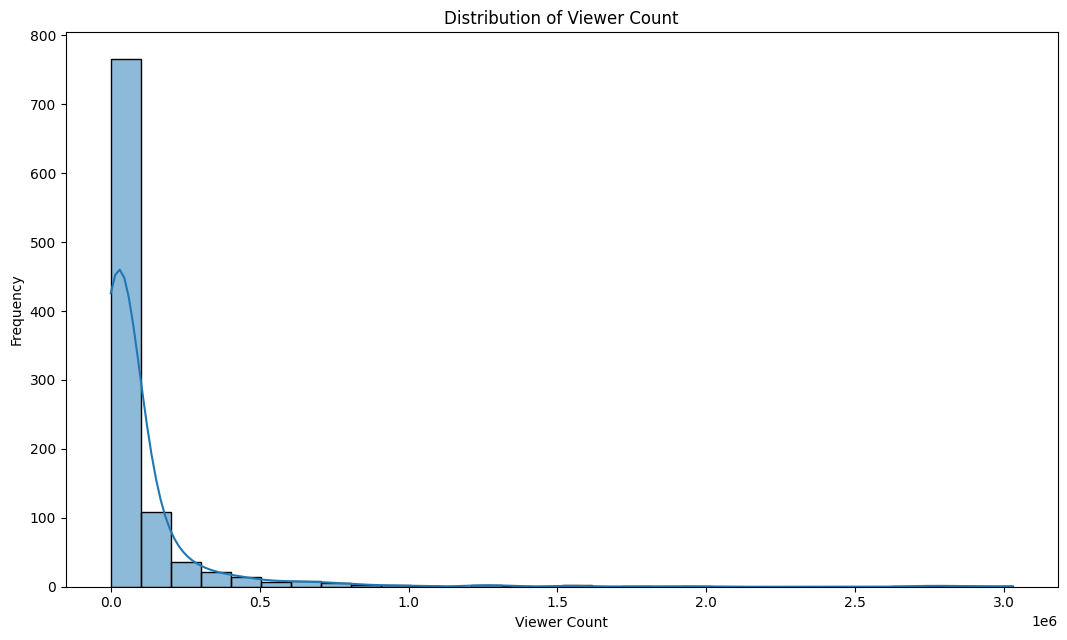

In [5]:
# Figure Resolution: 1280x720p.
set_figure()

# Chart Content.
sns.histplot(df.Views.dropna(), bins = 30, kde = True)

# Chart Decoration.
chart_decoration(title = 'Distribution of Viewer Count', xlabel = 'Viewer Count', ylabel = 'Frequency')

## 2. Correlation

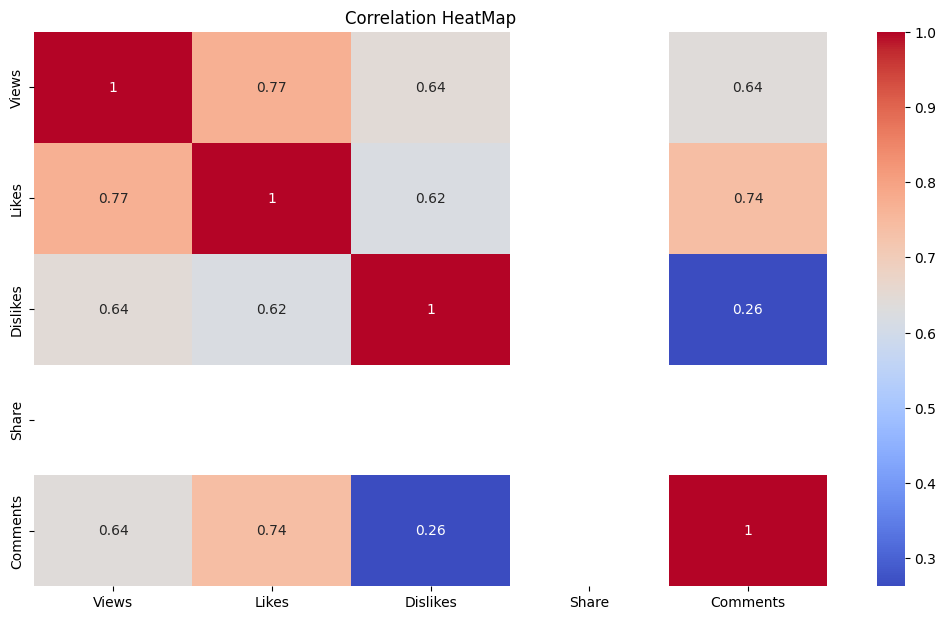

In [6]:
set_figure()

sns.heatmap(df.drop('MovieID', axis = 1).corr(), annot = True, cmap = 'coolwarm')

chart_decoration(title = 'Correlation HeatMap')

## 3. Top 10 Movies by View-Count.

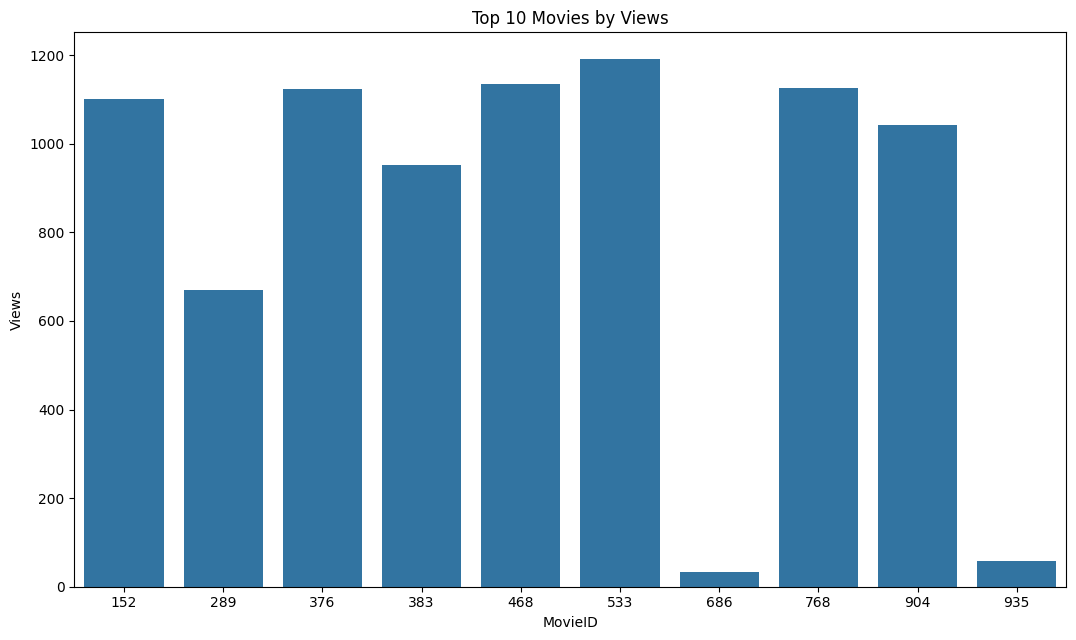

In [7]:
set_figure()

sns.barplot(x = 'MovieID',
            y = 'Views',
            data = df[['MovieID', 'Views']].dropna().sort_values(by = 'Views', ascending = True).head(10))

chart_decoration(title = 'Top 10 Movies by Views',
                 xlabel = 'MovieID',
                 ylabel = 'Views')

## 4. Joint Distribution of Views and Likes

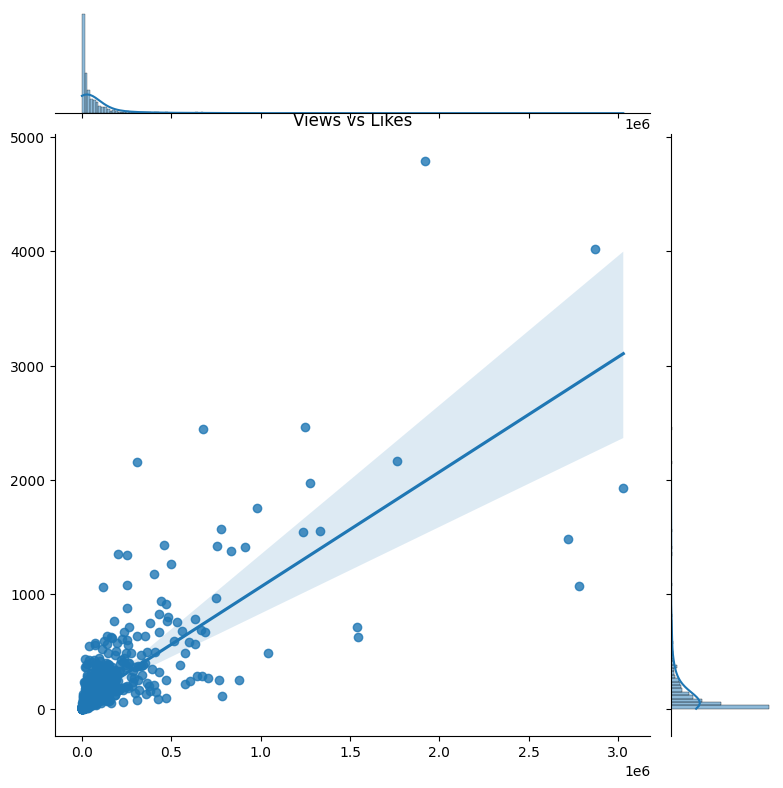

In [8]:
sns.jointplot(data = df,
              x = 'Views',
              y = 'Likes',
              kind = 'reg',
              height = 8)

chart_decoration(title = 'Views vs Likes')

### Observations:
- More Views = More Likes
- Less Views ~ Less Likes
- More Likes = More Views
- Less Likes = Less Views (not always)
- Some Movies have more likes than actual views
- Many Movies found having not as many likes as views.

## 5. Cumulative Views by MovieID

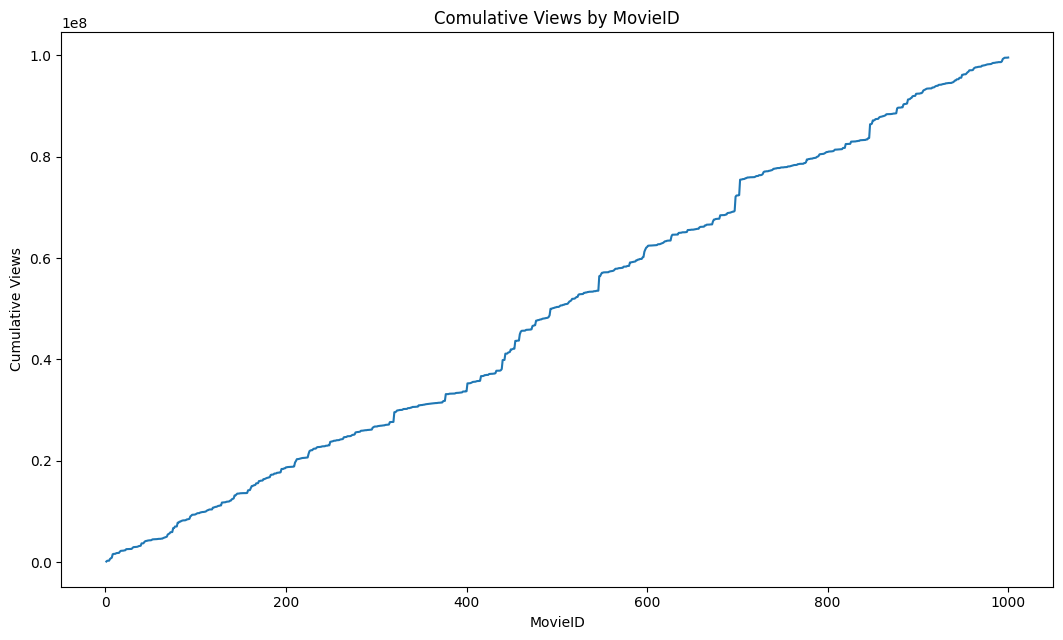

In [9]:
set_figure()

# Data Filtering.
cum_df = df[['MovieID', 'Views']].dropna().sort_values(by = 'MovieID')
cum_df['CumulativeViews'] = cum_df.Views.cumsum()

sns.lineplot(data = cum_df,
             x = 'MovieID',
             y = 'CumulativeViews')

chart_decoration(title = 'Comulative Views by MovieID',
                 xlabel = 'MovieID',
                 ylabel = 'Cumulative Views')

## 6. Distribution of Dislikes

In [10]:
px.histogram(df,
             x = 'Dislikes',
             nbins = 30,
             title = 'Distribution of Dislikes',
             marginal = 'box').show()

## 7. Views vs Dislikes

In [11]:
px.scatter(df,
           x = 'Views',
           y = 'Dislikes',
           trendline = 'ols',
           title = 'Views vs Dislikes').show()

### Observations:
- More Likes = More Views Trend
- More Dislikes = Less View Trend

## 8. Likes vs Dislikes

In [12]:
px.scatter(df[['Views', 'Likes', 'Dislikes']],
           x = 'Likes',
           y = 'Dislikes',
           trendline = 'ols',
           title = 'Likes vs Dislikes').show()

### Oberservation
- More Views Comes On More Liked Content

## 9. Top 10 Most Shared Movies

In [13]:
px.bar(data_frame = df[['MovieID', 'Share']].dropna().sort_values(by = 'Share', ascending = False).head(10),
       x = 'MovieID',
       y = 'Share',
       title = 'Top 10 Most Shared Movies').show()

In [14]:
df.Share.describe()

count    983.0
mean       0.0
std        0.0
min        0.0
25%        0.0
50%        0.0
75%        0.0
max        0.0
Name: Share, dtype: float64

### Oberservation:
- Well, none of the movies were shared.

## 10. Top 10 Most Commented Movies

In [15]:
px.bar(data_frame = df[['MovieID', 'Comments']].dropna().sort_values(by = 'Comments', ascending = False).head(10),
       x = 'MovieID',
       y = 'Comments',
       title = 'Top 10 Most Commented Movies').show()